<a href="https://colab.research.google.com/github/ma7moud-3baset/Detecting-plant-diseases-Using-Digital-Image-Processing-/blob/main/Detecting%20plant%20diseases%20Using%20DIP%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/kaggle.json'

In [22]:
import os
os.environ['KAGGLE_USERNAME'] = "mahmoudabdelbaset72"
os.environ['KAGGLE_KEY'] = "ef0a7ff926d18b1a74bdf0c2b9b9266c"

!kaggle datasets download -d abdallahalidev/plantvillage-dataset
!unzip plantvillage-dataset.zip -d plantvillage


Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Cur

In [26]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])


['grayscale', 'color', 'segmented']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']


In [27]:

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout

In [28]:
# Dataset Path
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


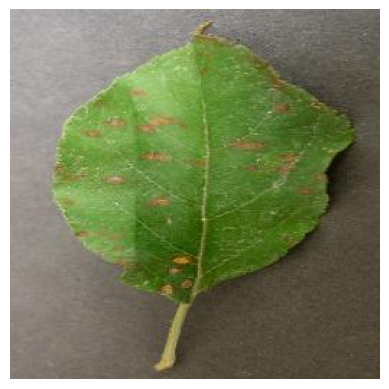

In [29]:
#showing on images on dataset
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [30]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [31]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

# Create the validation generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential()

# Convolution Step 1
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution Step 2
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution Step 3
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolution Step 4
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolution Step 5
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Flattening Step
model.add(Flatten())

# Full Connection Step
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=38, activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │    13,109,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │             

 Total params: 23,165,726 (88.37 MB)

 Trainable params: 23,152,782 (88.32 MB)

 Non-trainable params: 12,944 (50.56 KB)

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [33]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(
 #   train_generator,
  #  epochs=10,
   # validation_data=validation_generator,
    #callbacks=[early_stopping, model_checkpoint, reduce_lr]
#)


In [48]:
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=10,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.4373 - loss: 2.1931

100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 509ms/step - accuracy: 0.4374 - loss: 2.1923 - val_accuracy: 0.4250 - val_loss: 2.1077 - learning_rate: 1.0000e-04
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 770ms/step - accuracy: 0.4773 - loss: 1.9595 - val_accuracy: 0.3969 - val_loss: 2.2464 - learning_rate: 1.0000e-04
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.4549 - loss: 1.9097

100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.4550 - loss: 1.9100 - val_accuracy: 0.5688 - val_loss: 1.7714 - learning_rate: 1.0000e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 790ms/step - accuracy: 0.4880 - loss: 1.8393 - val_accuracy: 0.2844 - val_loss: 3.0332 - learning_rate: 1.0000e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.5163 - loss: 1.7188 - val_accuracy: 0.1813 - val_loss: 6.1650 - learning_rate: 1.0000e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 786ms/step - accuracy: 0.5379 - loss: 1.6340 - val_accuracy: 0.4000 - val_loss: 2.1400 - learning_rate: 1.0000e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 442ms/step - accuracy: 0.5162 - loss: 1.6672 - val_accuracy: 0.3406 - val_loss: 2.9286 - learning_rate: 1.0000e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.5536 - loss: 1.5742 - val_accuracy: 0.2062 - val_loss: 5.5979 - learning_rate: 1.0000e-04
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - a

100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 447ms/step - accuracy: 0.5567 - loss: 1.5010 - val_accuracy: 0.5469 - val_loss: 1.4534 - learning_rate: 1.0000e-05
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5589 - loss: 1.4781

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.5590 - loss: 1.4779 - val_accuracy: 0.6250 - val_loss: 1.2371 - learning_rate: 1.0000e-05


In [49]:

model_save_path = '/content/drive/MyDrive/AlexNetModel.hdf5'
model.save(model_save_path)


In [ ]:
from google.colab import files
files.upload()


<ipython-input-68-4f7cc70fb1b8>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(source)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


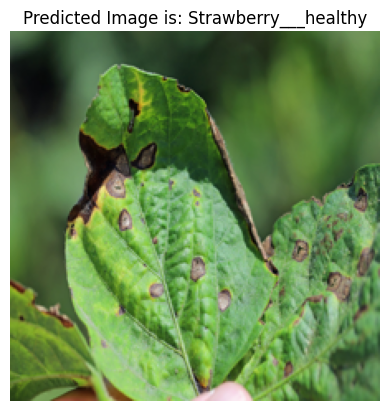

In [68]:
import imageio
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Define the target class names
target_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
                'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
                'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
                'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
                'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
                'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
                'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot',
                'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

def run(source=None):
    # Load the model
    model = tf.keras.models.load_model('/content/drive/MyDrive/AlexNetModel.hdf5')

    # Load and preprocess the image
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Make a prediction
    prediction = model.predict(x)

    # Get the predicted class
    predicted_class = target_names[np.argmax(prediction)]

    # Display the image with the predicted class name
    plt.imshow(img)
    plt.title(f"Predicted Image is: {predicted_class}")
    plt.axis('off')  # Hide the axes
    plt.show()

# Run the function with the path to your image
run(source='/content/leave-with-fungus.jpg')


In [69]:
from google.colab import files
files.upload()

Saving leaf.jpg to leaf.jpg


{'leaf.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x05\x04\x04\x04\x04\x03\x05\x04\x04\x04\x06\x05\x05\x06\x08\r\x08\x08\x07\x07\x08\x10\x0b\x0c\t\r\x13\x10\x14\x13\x12\x10\x12\x12\x14\x17\x1d\x19\x14\x16\x1c\x16\x12\x12\x1a#\x1a\x1c\x1e\x1f!!!\x14\x19$\'$ &\x1d ! \xff\xdb\x00C\x01\x05\x06\x06\x08\x07\x08\x0f\x08\x08\x0f \x15\x12\x15                                                  \xff\xc0\x00\x11\x08\x01\xc2\x02\xa3\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4

<ipython-input-68-4f7cc70fb1b8>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(source)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step


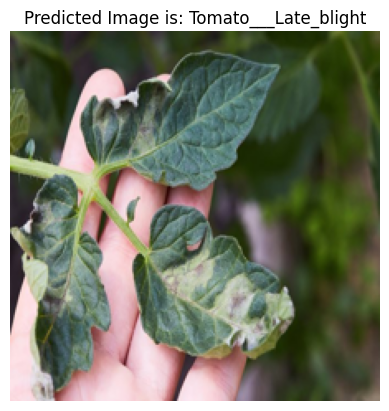

In [70]:
run(source='/content/leaf.jpg')

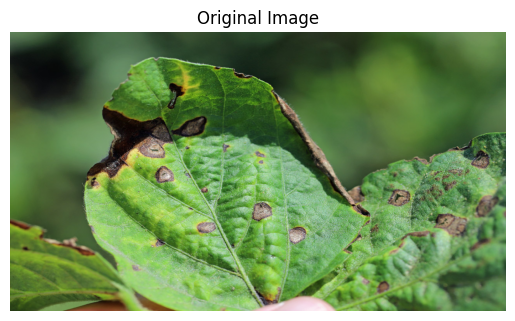

In [75]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/leave-with-fungus.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


**Adjust Brightness & Contrast**

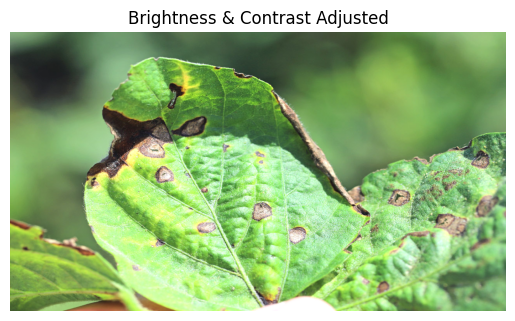

In [76]:
def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

bright_contrast = adjust_brightness_contrast(image)

plt.imshow(bright_contrast)
plt.title("Brightness & Contrast Adjusted")
plt.axis('off')
plt.show()


**Gaussian Blur**

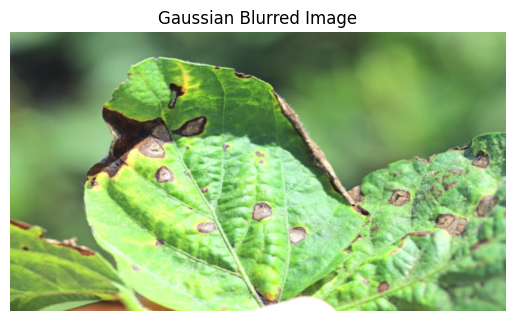

In [77]:
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

blurred = apply_gaussian_blur(bright_contrast)

plt.imshow(blurred)
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()


**Remove Noise**

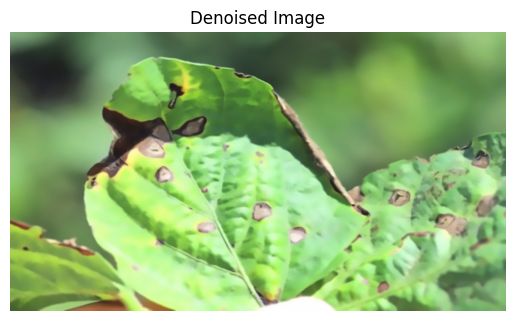

In [78]:
def denoise_image(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

denoised = denoise_image(blurred)

plt.imshow(denoised)
plt.title("Denoised Image")
plt.axis('off')
plt.show()


**Canny Edge Detection**

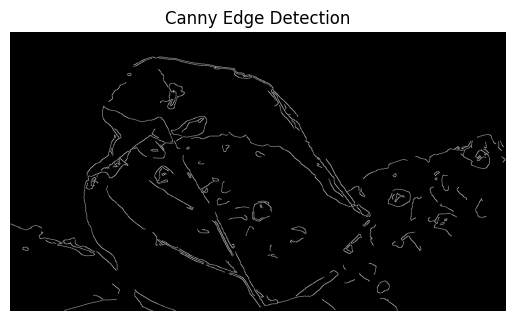

In [79]:
def detect_edges(image, low_threshold=100, high_threshold=200):
    return cv2.Canny(image, low_threshold, high_threshold)

edges = detect_edges(denoised)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


**ORB Feature Points**

Num of Feature Points: 500


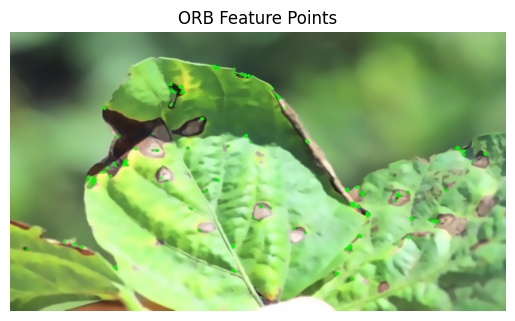

In [81]:
def extract_orb_features(image):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    features_img = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    print(f"Num of Feature Points: {len(keypoints)}")
    return features_img

orb_features = extract_orb_features(denoised)

plt.imshow(orb_features)
plt.title("ORB Feature Points")
plt.axis('off')
plt.show()
